In [1]:
using Pkg
Pkg.activate(".")
using MLDatasets
using Flux
using Statistics

# Force reload the module
if isdefined(Main, :AdversarialAttacks)
    # Clear the old module
    Main.AdversarialAttacks = nothing
end

include("src/AdversarialAttacks.jl")
using .AdversarialAttacks

  Activating project at `~/Documents/WS25/Julia/AdversarialAttacks.jl`


In [31]:
train_model = true

true

In [3]:
c10_train = CIFAR10(:train)
c10_test = CIFAR10(:test)

dataset CIFAR10:
  metadata  =>    Dict{String, Any} with 2 entries
  split     =>    :test
  features  =>    32×32×3×10000 Array{Float32, 4}
  targets   =>    10000-element Vector{Int64}

In [4]:
function preprocess(dataset)
    x, y = dataset[:]

    x = reshape(x, 32, 32, 3, :)

    # One-hot encode targets
    y = Flux.onehotbatch(y, 0:9)

    return x, y
end

preprocess (generic function with 1 method)

In [5]:
x_train, y_train = preprocess(c10_train)
x_test, y_test = preprocess(c10_test)

(Float32[0.61960787 0.59607846 … 0.23921569 0.21176471; 0.62352943 0.5921569 … 0.19215687 0.21960784; … ; 0.49411765 0.49019608 … 0.11372549 0.13333334; 0.45490196 0.46666667 … 0.078431375 0.08235294;;; 0.4392157 0.4392157 … 0.45490196 0.41960785; 0.43529412 0.43137255 … 0.4 0.4117647; … ; 0.35686275 0.35686275 … 0.32156864 0.32941177; 0.33333334 0.34509805 … 0.2509804 0.2627451;;; 0.19215687 0.2 … 0.65882355 0.627451; 0.18431373 0.15686275 … 0.5803922 0.58431375; … ; 0.14117648 0.1254902 … 0.49411765 0.5058824; 0.12941177 0.13333334 … 0.41960785 0.43137255;;;; 0.92156863 0.93333334 … 0.32156864 0.33333334; 0.90588236 0.92156863 … 0.18039216 0.24313726; … ; 0.9137255 0.9254902 … 0.7254902 0.7058824; 0.9098039 0.92156863 … 0.73333335 0.7294118;;; 0.92156863 0.93333334 … 0.3764706 0.39607844; 0.90588236 0.92156863 … 0.22352941 0.29411766; … ; 0.9137255 0.9254902 … 0.78431374 0.7647059; 0.9098039 0.92156863 … 0.7921569 0.78431374;;; 0.92156863 0.93333334 … 0.32156864 0.3254902; 0.90588236

In [29]:
batchsize = 256
train_loader = Flux.DataLoader((x_train, y_train); batchsize=batchsize, shuffle=true);
model = Chain(
    Conv((3, 3), 3 => 32, pad=1, relu),
    Conv((3, 3), 32 => 32, pad=1, relu),
    MaxPool((2, 2)),

    Conv((3, 3), 32 => 64, pad=1, relu),
    Conv((3, 3), 64 => 64, pad=1, relu),
    MaxPool((2, 2)),

    Flux.flatten,
    Dense(8 * 8 * 64, 256, relu),
    Dense(256, 10),
)
loss_fn(ŷ, y) = Flux.logitcrossentropy(ŷ, y)
optim = Flux.setup(Adam(0.001), model)


(layers = ((σ = (), weight = Leaf(Adam(eta=0.001, beta=(0.9, 0.999), epsilon=1.0e-8), (Float32[0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;;; … ;;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0], Float32[0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;;; 0.0 0.0 0.0; 0.0 0.0 0.0

In [7]:
function accuracy(model)
    # Use onecold to return class index
    ŷ = Flux.onecold(model(x_test))
    y = Flux.onecold(y_test)

    return mean(ŷ .== y)
end

accuracy (generic function with 1 method)

In [ ]:
losses = Float32[]
if train_model    
    for epoch in 1:5
        for (i, (x, y)) in enumerate(train_loader)
            loss, grads = Flux.withgradient(m -> loss_fn(m(x), y), model)
            Flux.update!(optim, model, grads[1])
            push!(losses, loss)
            if isone(i) || iszero(i % 50)
                acc = accuracy(model) * 100
                println("Epoch $epoch, step $i:\t loss = $(loss), acc = $(acc)%")
            end
        end
    end
end

In [9]:
# Save the trained model
using BSON: @save
@save "trained_model.bson" model

In [10]:
# Reload the model from file
using BSON: @load
@load "trained_model.bson" model
println("Model loaded successfully!")
model

Model loaded successfully!


Chain(
  Conv((3, 3), 3 => 32, relu, pad=1),   # 896 parameters
  Conv((3, 3), 32 => 32, relu, pad=1),  # 9_248 parameters
  MaxPool((2, 2)),
  Conv((3, 3), 32 => 64, relu, pad=1),  # 18_496 parameters
  Conv((3, 3), 64 => 64, relu, pad=1),  # 36_928 parameters
  MaxPool((2, 2)),
  Flux.flatten,
  Dense(4096 => 256, relu),             # 1_048_832 parameters
  Dense(256 => 10),                     # 2_570 parameters
)                   # Total: 12 arrays, 1_116_970 parameters, 4.262 MiB.

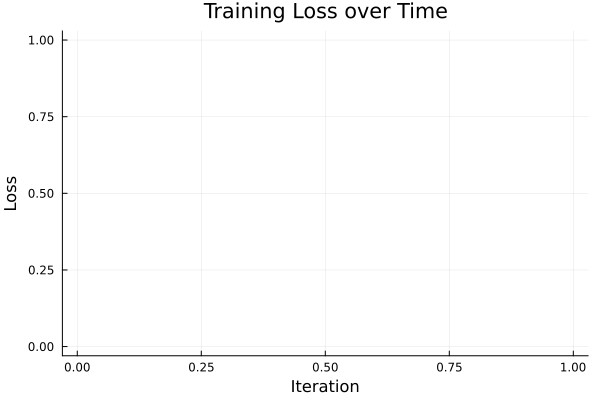

In [ ]:
using Plots
if train_model
    plot(losses, title="Training Loss over Time", xlabel="Iteration", ylabel="Loss", legend=false)

In [27]:
# Wrap the Flux model
flux_model = FluxModel(model)

# Select a single image (index 9) and keep batch dimension for the model
image_idx = 164
x_sample = x_test[:, :, :, image_idx:image_idx]  # Shape: 32×32×3×1
y_sample = y_test[:, image_idx]  # One-hot vector for this image

# Create FGSM attack with epsilon=0.25
fgsm = FGSM(Dict("epsilon" => 0.25))

# Generate adversarial example
sample = (data=x_sample, label=y_sample)
adv_sample = craft(sample, flux_model, fgsm)

32×32×3×1 Array{Float64, 4}:
[:, :, 1, 1] =
  0.677451    0.0598039   …   0.130392   0.57549    -0.0264706
  0.606863   -0.077451        0.551961   0.571569    0.493137
  0.330392   -0.0735294       0.0245098  0.516667    0.032353
  0.834314    0.248039       -0.0343137  0.548039    0.72451
  0.0715686   0.27549         0.114706   0.795098    0.834314
  0.426471   -0.0343137   …   0.310784   0.216667    0.697059
 -0.0813725   0.426471        0.704902   0.0519608   0.00882354
  0.434314   -0.022549        0.0558824  0.567647    0.548039
 -0.10098     0.610784        0.57549    0.669608    0.204902
  0.497059   -0.0343137      -0.0186274  0.0480392   0.638235
  ⋮                       ⋱              ⋮          
  0.446078    0.095098        0.361765   0.791176    0.228431
  0.0598039   0.114706        0.79902    0.193137    0.65
  0.504902    0.0205882   …   0.27549    0.197059    0.0872549
 -0.151961   -0.10098         0.244118   0.165686    0.567647
  0.661765    0.0833333       0.6617

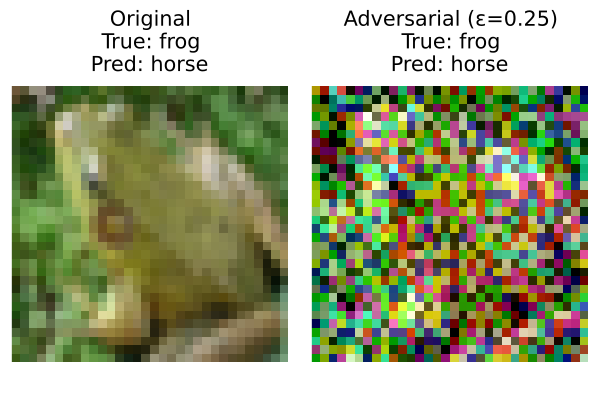

In [ ]:
# Plot original vs adversarial image
using Images

# Get predictions
original_pred = model(x_sample)
adv_pred = model(adv_sample)

# Convert to class labels
original_class = Flux.onecold(original_pred, 0:9)[1]
adv_class = Flux.onecold(adv_pred, 0:9)[1]
true_class = Flux.onecold(y_sample, 0:9)

# CIFAR-10 class names
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Extract single images (remove batch dimension)
img_original = x_sample[:, :, :, 1]  # 32x32x3
img_adv = adv_sample[:, :, :, 1]     # 32x32x3

# Clamp to valid range [0, 1]
img_original = clamp.(img_original, 0f0, 1f0)
img_adv = clamp.(img_adv, 0f0, 1f0)

# Convert to RGB format for display (CHW to CWH for colorview)
img_orig_rgb = colorview(RGB, permutedims(img_original, (3, 2, 1)))
img_adv_rgb = colorview(RGB, permutedims(img_adv, (3, 2, 1)))

# Plot side by side
p1 = plot(img_orig_rgb, axis=nothing, border=:none, 
          title="Original\nTrue: $(class_names[true_class+1])\nPred: $(class_names[original_class+1])")
p2 = plot(img_adv_rgb, axis=nothing, border=:none,
          title="Adversarial (ε=$(fgsm.parameters["epsilon"]))\nTrue: $(class_names[true_class+1])\nPred: $(class_names[adv_class+1])")

plot(p1, p2)